# Loader demos
Demos the loader functions and some related utility

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('../')

In [3]:
from roc_bike_growth.loader import POI_graph_from_polygon, bike_infra_from_polygon, carall_from_polygon

In [4]:
rochester = ox.geocode_to_gdf('rochester, ny').geometry[0]

## Bike infra network

In [5]:
bike_infra = bike_infra_from_polygon(rochester)

No OSM data for bike_designatedpath
No OSM data for bike_cyclewayrighttrack
No OSM data for bike_cyclewaylefttrack
No OSM data for bike_cyclestreet
No OSM data for bike_bicycleroad
No OSM data for bike_livingstreet
[<networkx.classes.multidigraph.MultiDiGraph object at 0x40819e8430>, <networkx.classes.multidigraph.MultiDiGraph object at 0x40819ec460>, <networkx.classes.multidigraph.MultiDiGraph object at 0x40819ec850>, <networkx.classes.multidigraph.MultiDiGraph object at 0x4081b7eb50>]


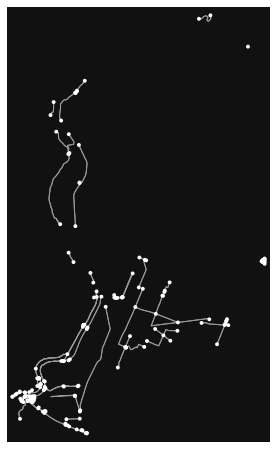

In [6]:
fig, ax = ox.plot.plot_graph(bike_infra)

## All driveable infra network (with POIs)

In [7]:
carall = carall_from_polygon(rochester, add_pois=True)

Exception at Port of Rochester, Lake Ave . This point will be dropped:
 Nominatim could not geocode query "Port of Rochester, Lake Ave  rochester ny"
Exception at 810-846 N GOODMAN ST. This point will be dropped:
 Nominatim could not geocode query "810-846 N GOODMAN ST rochester ny"
Exception at 650-672 E Main St. This point will be dropped:
 Nominatim could not geocode query "650-672 E Main St rochester ny"
Exception at 497-499 S. CLINTON. This point will be dropped:
 Nominatim could not geocode query "497-499 S. CLINTON rochester ny"


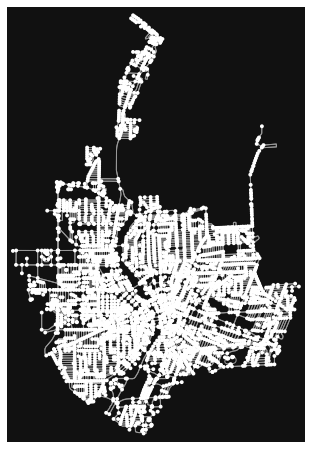

In [8]:
fig, ax = ox.plot.plot_graph(carall)

In [9]:
# Get list of POIs
pois = nx.get_node_attributes(carall, 'poi').keys()

In [10]:
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])

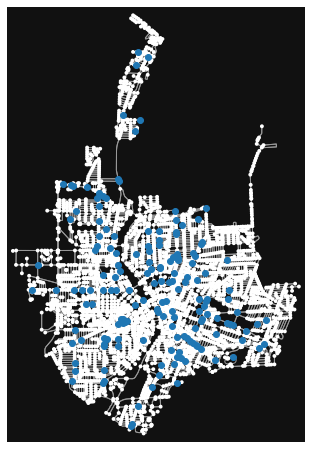

In [11]:
ax.scatter(x,y)
fig